# Clustering

In contrast to *supervised* machine learning, *unsupervised* learning is used when there is no "ground truth" from which to train and validate label predictions. The most common form of unsupervised learning is *clustering*, which is simllar conceptually to *classification*, except that the the training data does not include known values for the class label to be predicted. Clustering works by separating the training cases based on similarities that can be determined from their feature values. Think of it this way; the numeric features of a given entity can be thought of as vector coordinates that define the entity's position in n-dimensional space. What a clustering model seeks to do is to identify groups, or *clusters*, of entities that are close to one another while being separated from other clusters.

For example, let's take a look at a dataset that contains measurements of different species of wheat seed.

> **Citation**: The seeds dataset used in the this exercise was originally published by the Institute of Agrophysics of the Polish Academy of Sciences in Lublin, and can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science).

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
182,12.19,13.36,0.8579,5.240,2.909,4.857
84,19.51,16.71,0.8780,6.366,3.801,2.962
7,14.11,14.10,0.8911,5.420,3.302,2.700
2,14.29,14.09,0.9050,5.291,3.337,2.699
132,15.38,14.90,0.8706,5.884,3.268,4.462
108,19.94,16.92,0.8752,6.675,3.763,3.252
200,12.38,13.44,0.8609,5.219,2.989,5.472
179,12.21,13.47,0.8453,5.357,2.893,1.661
191,11.27,12.86,0.8563,5.091,2.804,3.985
89,20.88,17.05,0.9031,6.450,4.032,5.016


As you can see, the dataset contains six data points (or *features*) for each instance (*observation*) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot; so we'll take advantage of a mathematical technique called *Principal Component Analysis* (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the six-dimensional feature values into two-dimensional coordinates.

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])
print(scaled_features[0:5])

[[0.44098206 0.50206612 0.5707804  0.48648649 0.48610121 0.18930164]
 [0.40509915 0.44628099 0.66243194 0.36880631 0.50106914 0.03288302]
 [0.34938621 0.34710744 0.87931034 0.22072072 0.50392017 0.25145302]
 [0.3068933  0.3161157  0.79310345 0.2393018  0.53385602 0.19424255]
 [0.52407932 0.53305785 0.86479129 0.42736486 0.66429081 0.07670104]]


In [3]:
# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)

features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

Now that we have the data points translated to two dimensions, we can visualize them in a plot:

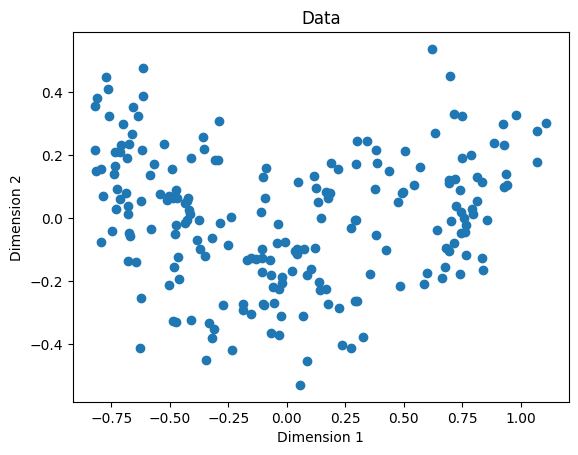

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Hopefully you can see at least two, arguably three, reasonably distinct groups of data points; but here lies one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the *within cluster sum of squares* (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.


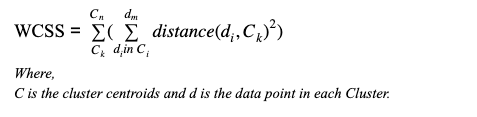